In [1]:
install.packages("ggimage")

Installing package into 'C:/Users/winch/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'ggimage' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\winch\AppData\Local\Temp\Rtmpuexcs0\downloaded_packages


In [2]:
library("glmnet")
library("boot")
library(MASS)
library("pscl")
library(ggplot2)
library(lubridate)
library("dplyr")
library(ggimage)

Warning message:
"package 'glmnet' was built under R version 4.3.2"
Loading required package: Matrix

Loaded glmnet 4.1-8

Warning message:
"package 'boot' was built under R version 4.3.3"
Warning message:
"package 'pscl' was built under R version 4.3.3"
Classes and Methods for R originally developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University (2002-2015),
by and under the direction of Simon Jackman.
hurdle and zeroinfl functions by Achim Zeileis.


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union



Attaching package: 'dplyr'


The following object is masked from 'package:MASS':

    select


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggimage' was built under R version 4.3.3"


In [3]:
oil_pts_pos <- read.csv('oil_pts_pos_df.csv')

In [4]:
all_pts_pos <- read.csv('pts_pos_df.csv')

In [5]:
head(all_pts_pos)

,X,Team,PTS,P.,pos_score
,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,0,ANA,2,0.3333333,-0.6797153
2,1,ARI,1,0.1250000,-1.3633634
3,2,BOS,3,0.3000000,-0.6909769
4,3,BUF,2,0.2500000,-1.0448040
5,4,CAR,4,0.5000000,-0.7520151
6,5,CBJ,0,0.0000000,-1.4807172


In [6]:
total_comment_num_avg_pos_score <- read.csv('total_comment_numbers_avg_pos_score_with_logos.csv')

In [7]:
oilers_pos <- read.csv('oilers_pos_scores_feb_apr.csv')

## Plotting PTS % vs Pos Score

In [8]:
model <- lm(pos_score ~ P., data = all_pts_pos)
r_squared <- summary(model)$r.squared

In [9]:
pts_pos <- ggplot(all_pts_pos, aes(x = P., y = pos_score)) +
    geom_point(color = "#0099f8") +
    geom_smooth(method = "lm", se = FALSE, color = "#FF8C00") +
    labs(title = "Positivity Score vs Points Percentage",
         subtitle = paste("R² =", format(r_squared, digits = 4)),
        x = "Points Percetange (P%)", 
        y = "Positivity Score",
         caption =  "*Positivity Score and Points Percentage are Calculated on a bi-weekly basis between Feb. 1st to Apr. 18th, 2024")
 theme_minimal() 

List of 97
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

In [32]:
ggsave("pts_pos.png", plot = pts_pos, width = 10, height = 8, units = "in", dpi = 300)

`geom_smooth()` using formula = 'y ~ x'


## Plotting Number of Comments Vs average Positivity score

In [10]:
head(total_comment_num_avg_pos_score)

,X,Unnamed..0,Team,comments,pos_score,logo
,<int>,<int>,<chr>,<int>,<dbl>,<chr>
1,0,0,DET,42308,0.433494863,nhl-logos/DET_logo.png
2,1,1,VAN,35978,0.007106528,nhl-logos/VAN_logo.png
3,2,2,EDM,33909,0.247394233,nhl-logos/EDM_logo.png
4,3,3,TOR,26277,-0.420184349,nhl-logos/TOR_logo.png
5,4,4,PHI,25580,-0.576385741,nhl-logos/PHI_logo.png
6,5,5,NYR,25039,0.790293002,nhl-logos/NYR_logo.png


In [29]:
num_comments_pos <- ggplot(total_comment_num_avg_pos_score, aes(x = comments, y = pos_score)) +
    geom_image(aes(image = logo), size = 0.1) +
    labs(title = "Average Positivity Score vs Number of Comments",
        x = "Number of Comments", 
        y = "Average Positivity Score")
 theme_minimal() 

List of 97
 $ line                      :List of 6
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ lineend      : chr "butt"
  ..$ arrow        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_line" "element"
 $ rect                      :List of 5
  ..$ fill         : chr "white"
  ..$ colour       : chr "black"
  ..$ linewidth    : num 0.5
  ..$ linetype     : num 1
  ..$ inherit.blank: logi TRUE
  ..- attr(*, "class")= chr [1:2] "element_rect" "element"
 $ text                      :List of 11
  ..$ family       : chr ""
  ..$ face         : chr "plain"
  ..$ colour       : chr "black"
  ..$ size         : num 11
  ..$ hjust        : num 0.5
  ..$ vjust        : num 0.5
  ..$ angle        : num 0
  ..$ lineheight   : num 0.9
  ..$ margin       : 'margin' num [1:4] 0points 0points 0points 0points
  .. ..- attr(*, "unit")= int 8
  ..$ debug        : logi FALSE
  ..$ inherit.blank: logi TRUE
  ..- attr

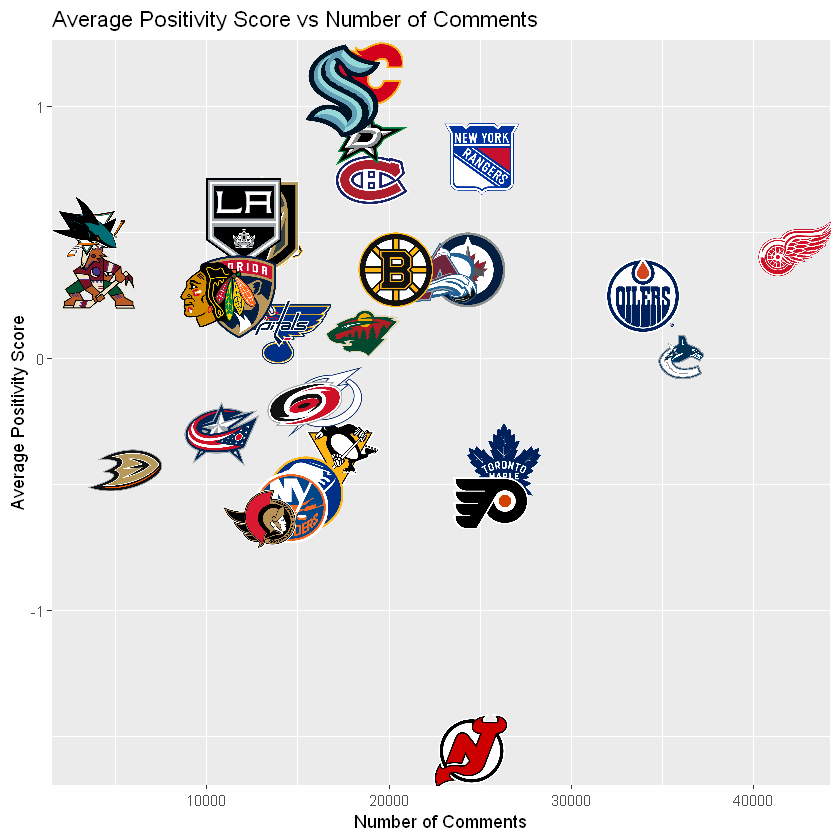

In [30]:
num_comments_pos

In [31]:
ggsave("num_comments_pos.png", plot = num_comments_pos, width = 10, height = 8, units = "in", dpi = 300)

## Plotting the Oilers Positivity Score

In [18]:
oilers_pos <- read.csv('oilers_pos_scores_feb_apr.csv')
oilers_pos

X,Team,pos_score,time_period
<int>,<chr>,<dbl>,<chr>
29,EDM,-0.67529737,feb1_feb15
29,EDM,-0.19315624,feb16_feb29
29,EDM,1.56298799,mar1_mar15
29,EDM,0.58274081,mar16_mar31
29,EDM,-0.04030402,apr1_apr18


In [19]:
oilers_pos$time_period <- gsub("_", " - ", oilers_pos$time_period)

# Capitalize all month abbreviations and add a period after each abbreviation
# oilers_pos$time_period <- gsub("feb", "Feb.", oilers_pos$time_period, ignore.case = TRUE)
# oilers_pos$time_period <- gsub("mar", "Mar.", oilers_pos$time_period, ignore.case = TRUE)
# oilers_pos$time_period <- gsub("apr", "Apr.", oilers_pos$time_period, ignore.case = TRUE)

In [20]:
oilers_pos

X,Team,pos_score,time_period
<int>,<chr>,<dbl>,<chr>
29,EDM,-0.67529737,feb1 - feb15
29,EDM,-0.19315624,feb16 - feb29
29,EDM,1.56298799,mar1 - mar15
29,EDM,0.58274081,mar16 - mar31
29,EDM,-0.04030402,apr1 - apr18


In [23]:
oilers_pos$time_period <- gsub("feb1", "Feb. 1", oilers_pos$time_period, ignore.case = TRUE)
oilers_pos$time_period <- gsub("feb16", "Feb. 16", oilers_pos$time_period, ignore.case = TRUE)
oilers_pos$time_period <- gsub("feb29", "Feb. 29", oilers_pos$time_period, ignore.case = TRUE)
oilers_pos$time_period <- gsub("mar1", "Mar. 1", oilers_pos$time_period, ignore.case = TRUE)
oilers_pos$time_period <- gsub("mar16", "Mar. 16", oilers_pos$time_period, ignore.case = TRUE)
oilers_pos$time_period <- gsub("mar31", "Mar. 31", oilers_pos$time_period, ignore.case = TRUE)
oilers_pos$time_period <- gsub("apr1", "Apr. 1", oilers_pos$time_period, ignore.case = TRUE)
oilers_pos$time_period <- gsub("apr18", "Apr. 18", oilers_pos$time_period, ignore.case = TRUE)


In [24]:
oilers_pos

X,Team,pos_score,time_period
<int>,<chr>,<dbl>,<chr>
29,EDM,-0.67529737,Feb. 1 - Feb. 15
29,EDM,-0.19315624,Feb. 16 - Feb. 29
29,EDM,1.56298799,Mar. 1 - Mar. 15
29,EDM,0.58274081,Mar. 16 - Mar. 31
29,EDM,-0.04030402,Apr. 1 - Apr. 18


In [25]:
oilers_pos$time_period <- factor(oilers_pos$time_period, levels = c("Feb. 1 - Feb. 15", "Feb. 16 - Feb. 29", "Mar. 1 - Mar. 15", "Mar. 16 - Mar. 31", "Apr. 1 - Apr. 18"))

In [26]:
oilers_pos

X,Team,pos_score,time_period
<int>,<chr>,<dbl>,<fct>
29,EDM,-0.67529737,Feb. 1 - Feb. 15
29,EDM,-0.19315624,Feb. 16 - Feb. 29
29,EDM,1.56298799,Mar. 1 - Mar. 15
29,EDM,0.58274081,Mar. 16 - Mar. 31
29,EDM,-0.04030402,Apr. 1 - Apr. 18


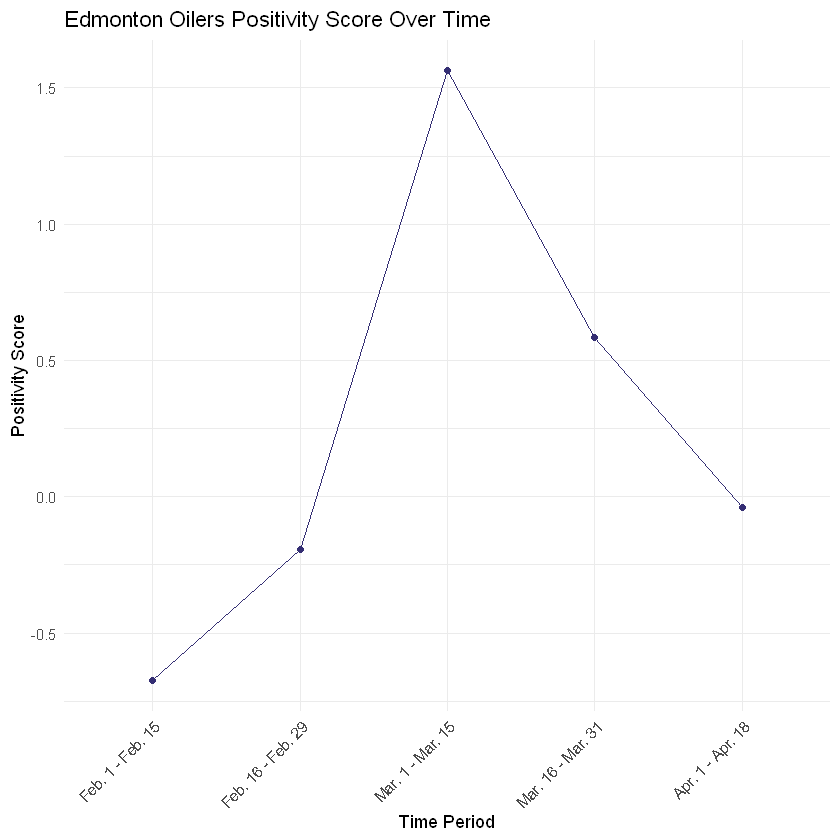

In [27]:
ggplot(oilers_pos, aes(x = time_period, y = pos_score, group = 1)) +
    geom_line(color = "#342e73") + 
    geom_point(color = "#342e73") +
    labs(title = "Edmonton Oilers Positivity Score Over Time",
        x = "Time Period",
        y = "Positivity Score") +
theme_minimal() + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [28]:
oil_pts_pos

X,Team,PTS,P.,pos_score
<int>,<chr>,<dbl>,<dbl>,<dbl>
11,EDM,4,0.4000000,-0.67529737
11,EDM,9,0.6428571,-0.19315624
11,EDM,11,0.7857143,1.56298799
11,EDM,11,0.6875000,0.58274081
11,EDM,10,0.5000000,-0.04030402
